# **Challenge TelecomX - Predicción De Cancelación**
## 🎯 **Misión**

La nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.  
La empresa TelecomX quiere anticiparse al problema de la cancelación, por lo que se pretende construir un pipeline robusto para esta etapa inicial de modelado.

## 🧠 **Objetivos del Desafío**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## **Preparacion de los datos**

### **Extracción**

In [70]:
import pandas as pd
# Importando los datos
datos = pd.read_csv('DataBase/TelecomXData.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,2.186667,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,1.996667,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,2.463333,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,3.266667,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,2.796667,267.40


In [71]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   int64  
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   objec

### **Eliminación de Columnas Irrelevantes**

In [72]:
# Eliminamos el identificadoe ID del cliente ya que no nos da información sobre si es probable que deje el servicio.
# Eliminamos el cargo diario, pues proviene del cargo mensual, ademas de que el este cargo mensual tiene menos decimales. Con esto reducimo el riesgo de errores futuros en el modelo.
datos = datos.drop(columns = ['customerID','account.Charges.daily'])

In [73]:
datos.sample(10)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4096,0,Female,0,0,1,35,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Credit card (automatic),20.10,644.50
4264,0,Female,0,1,0,72,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),88.05,6520.80
2995,0,Male,0,1,0,54,1,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,0,Electronic check,109.55,6118.95
5549,0,Female,0,1,0,45,1,No,DSL,No,No,Yes,No,No,No,Month-to-month,1,Credit card (automatic),50.25,2221.55
3362,0,Male,0,1,0,62,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,1,Bank transfer (automatic),107.60,6912.70
144,0,Female,0,0,0,60,1,Yes,Fiber optic,No,No,Yes,No,No,No,One year,1,Bank transfer (automatic),79.20,4765.00
3996,1,Female,1,0,0,3,0,No phone service,DSL,No,No,No,No,No,No,Month-to-month,0,Electronic check,25.30,77.75
6956,0,Female,0,1,1,56,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,Mailed check,24.45,1385.85
3845,1,Female,1,0,0,2,1,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,1,Electronic check,85.55,187.45
5109,0,Male,0,1,1,60,1,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,1,Electronic check,110.60,6586.85


### **Transformando las columnas binarias** 

In [74]:
datos['customer.gender'] = datos['customer.gender'].map({'Male': 1, 'Female': 0})
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [75]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7256 non-null   int64  
 1   customer.gender            7256 non-null   int64  
 2   customer.SeniorCitizen     7256 non-null   int64  
 3   customer.Partner           7256 non-null   int64  
 4   customer.Dependents        7256 non-null   int64  
 5   customer.tenure            7256 non-null   int64  
 6   phone.PhoneService         7256 non-null   int64  
 7   phone.MultipleLines        7256 non-null   object 
 8   internet.InternetService   7256 non-null   object 
 9   internet.OnlineSecurity    7256 non-null   object 
 10  internet.OnlineBackup      7256 non-null   object 
 11  internet.DeviceProtection  7256 non-null   object 
 12  internet.TechSupport       7256 non-null   object 
 13  internet.StreamingTV       7256 non-null   objec

### **Encoding**

In [76]:
categoricas = [
    'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']
pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [77]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
3019,0,0,0,0,0,12,0,1,33.60,435.45,...,1,0,0,0,1,0,0,0,0,1
2622,0,0,0,0,0,54,1,1,20.50,1035.70,...,0,1,0,0,0,1,0,0,0,1
4873,0,0,0,1,1,43,0,1,51.25,2151.60,...,1,0,0,0,1,0,1,0,0,0
4754,1,1,0,0,1,1,1,1,93.30,93.30,...,0,0,1,1,0,0,0,0,1,0
4202,0,1,0,0,0,24,1,0,24.60,592.65,...,0,1,0,0,1,0,0,0,1,0


In [78]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7256 non-null   int64  
 1   customer.gender                                  7256 non-null   int64  
 2   customer.SeniorCitizen                           7256 non-null   int64  
 3   customer.Partner                                 7256 non-null   int64  
 4   customer.Dependents                              7256 non-null   int64  
 5   customer.tenure                                  7256 non-null   int64  
 6   phone.PhoneService                               7256 non-null   int64  
 7   account.PaperlessBilling                         7256 non-null   int64  
 8   account.Charges.Monthly                          7256 non-null   float64
 9   account.Charges.Total         

### **Correlación**

In [79]:
corr = datos_codificados.corr()
corr

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
Churn,1.000000,-0.009494,0.146400,-0.148106,-0.160347,-0.345799,0.012337,0.186309,0.189393,-0.194440,...,0.128793,-0.223755,0.060092,0.395067,-0.174340,-0.294467,-0.114953,-0.131448,0.294181,-0.089198
customer.gender,-0.009494,1.000000,-0.004239,-0.004593,0.011884,0.005936,-0.006065,-0.011417,-0.013126,0.000488,...,0.007785,0.005082,-0.012109,-0.001181,0.007063,-0.005361,-0.018316,0.001102,0.002149,0.014537
customer.SeniorCitizen,0.146400,-0.004239,1.000000,0.023439,-0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,...,0.035218,-0.182481,0.119049,0.136278,-0.047054,-0.114058,-0.015819,-0.022914,0.170320,-0.153742
customer.Partner,-0.148106,-0.004593,0.023439,1.000000,0.448500,0.379684,0.019496,-0.010303,0.098064,0.316918,...,-0.115649,-0.000448,0.116399,-0.277182,0.081293,0.245737,0.109764,0.081899,-0.079001,-0.099416
customer.Dependents,-0.160347,0.011884,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.110541,-0.114345,0.063960,...,-0.080119,0.140906,-0.038832,-0.228649,0.069582,0.200304,0.051254,0.062449,-0.150424,0.057690
customer.tenure,-0.345799,0.005936,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,...,-0.255267,-0.035545,0.286157,-0.650810,0.205752,0.562783,0.241031,0.235126,-0.208832,-0.232690
phone.PhoneService,0.012337,-0.006065,0.009885,0.019496,-0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,...,-0.110928,0.172730,-0.034847,-0.002686,-0.001727,0.004780,0.008099,-0.009893,0.004488,-0.003330
account.PaperlessBilling,0.186309,-0.011417,0.157470,-0.010303,-0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,...,0.061656,-0.324073,0.212314,0.167119,-0.051231,-0.146044,-0.018482,-0.011833,0.208592,-0.205076
account.Charges.Monthly,0.189393,-0.013126,0.220098,0.098064,-0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,...,0.017803,-0.763420,0.627997,0.058554,0.008672,-0.076567,0.038141,0.031132,0.275064,-0.377800
account.Charges.Total,-0.194440,0.000488,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,...,-0.203664,-0.374618,0.521245,-0.447152,0.175040,0.354547,0.180882,0.184990,-0.057178,-0.295076


#### **Matriz de correlación**

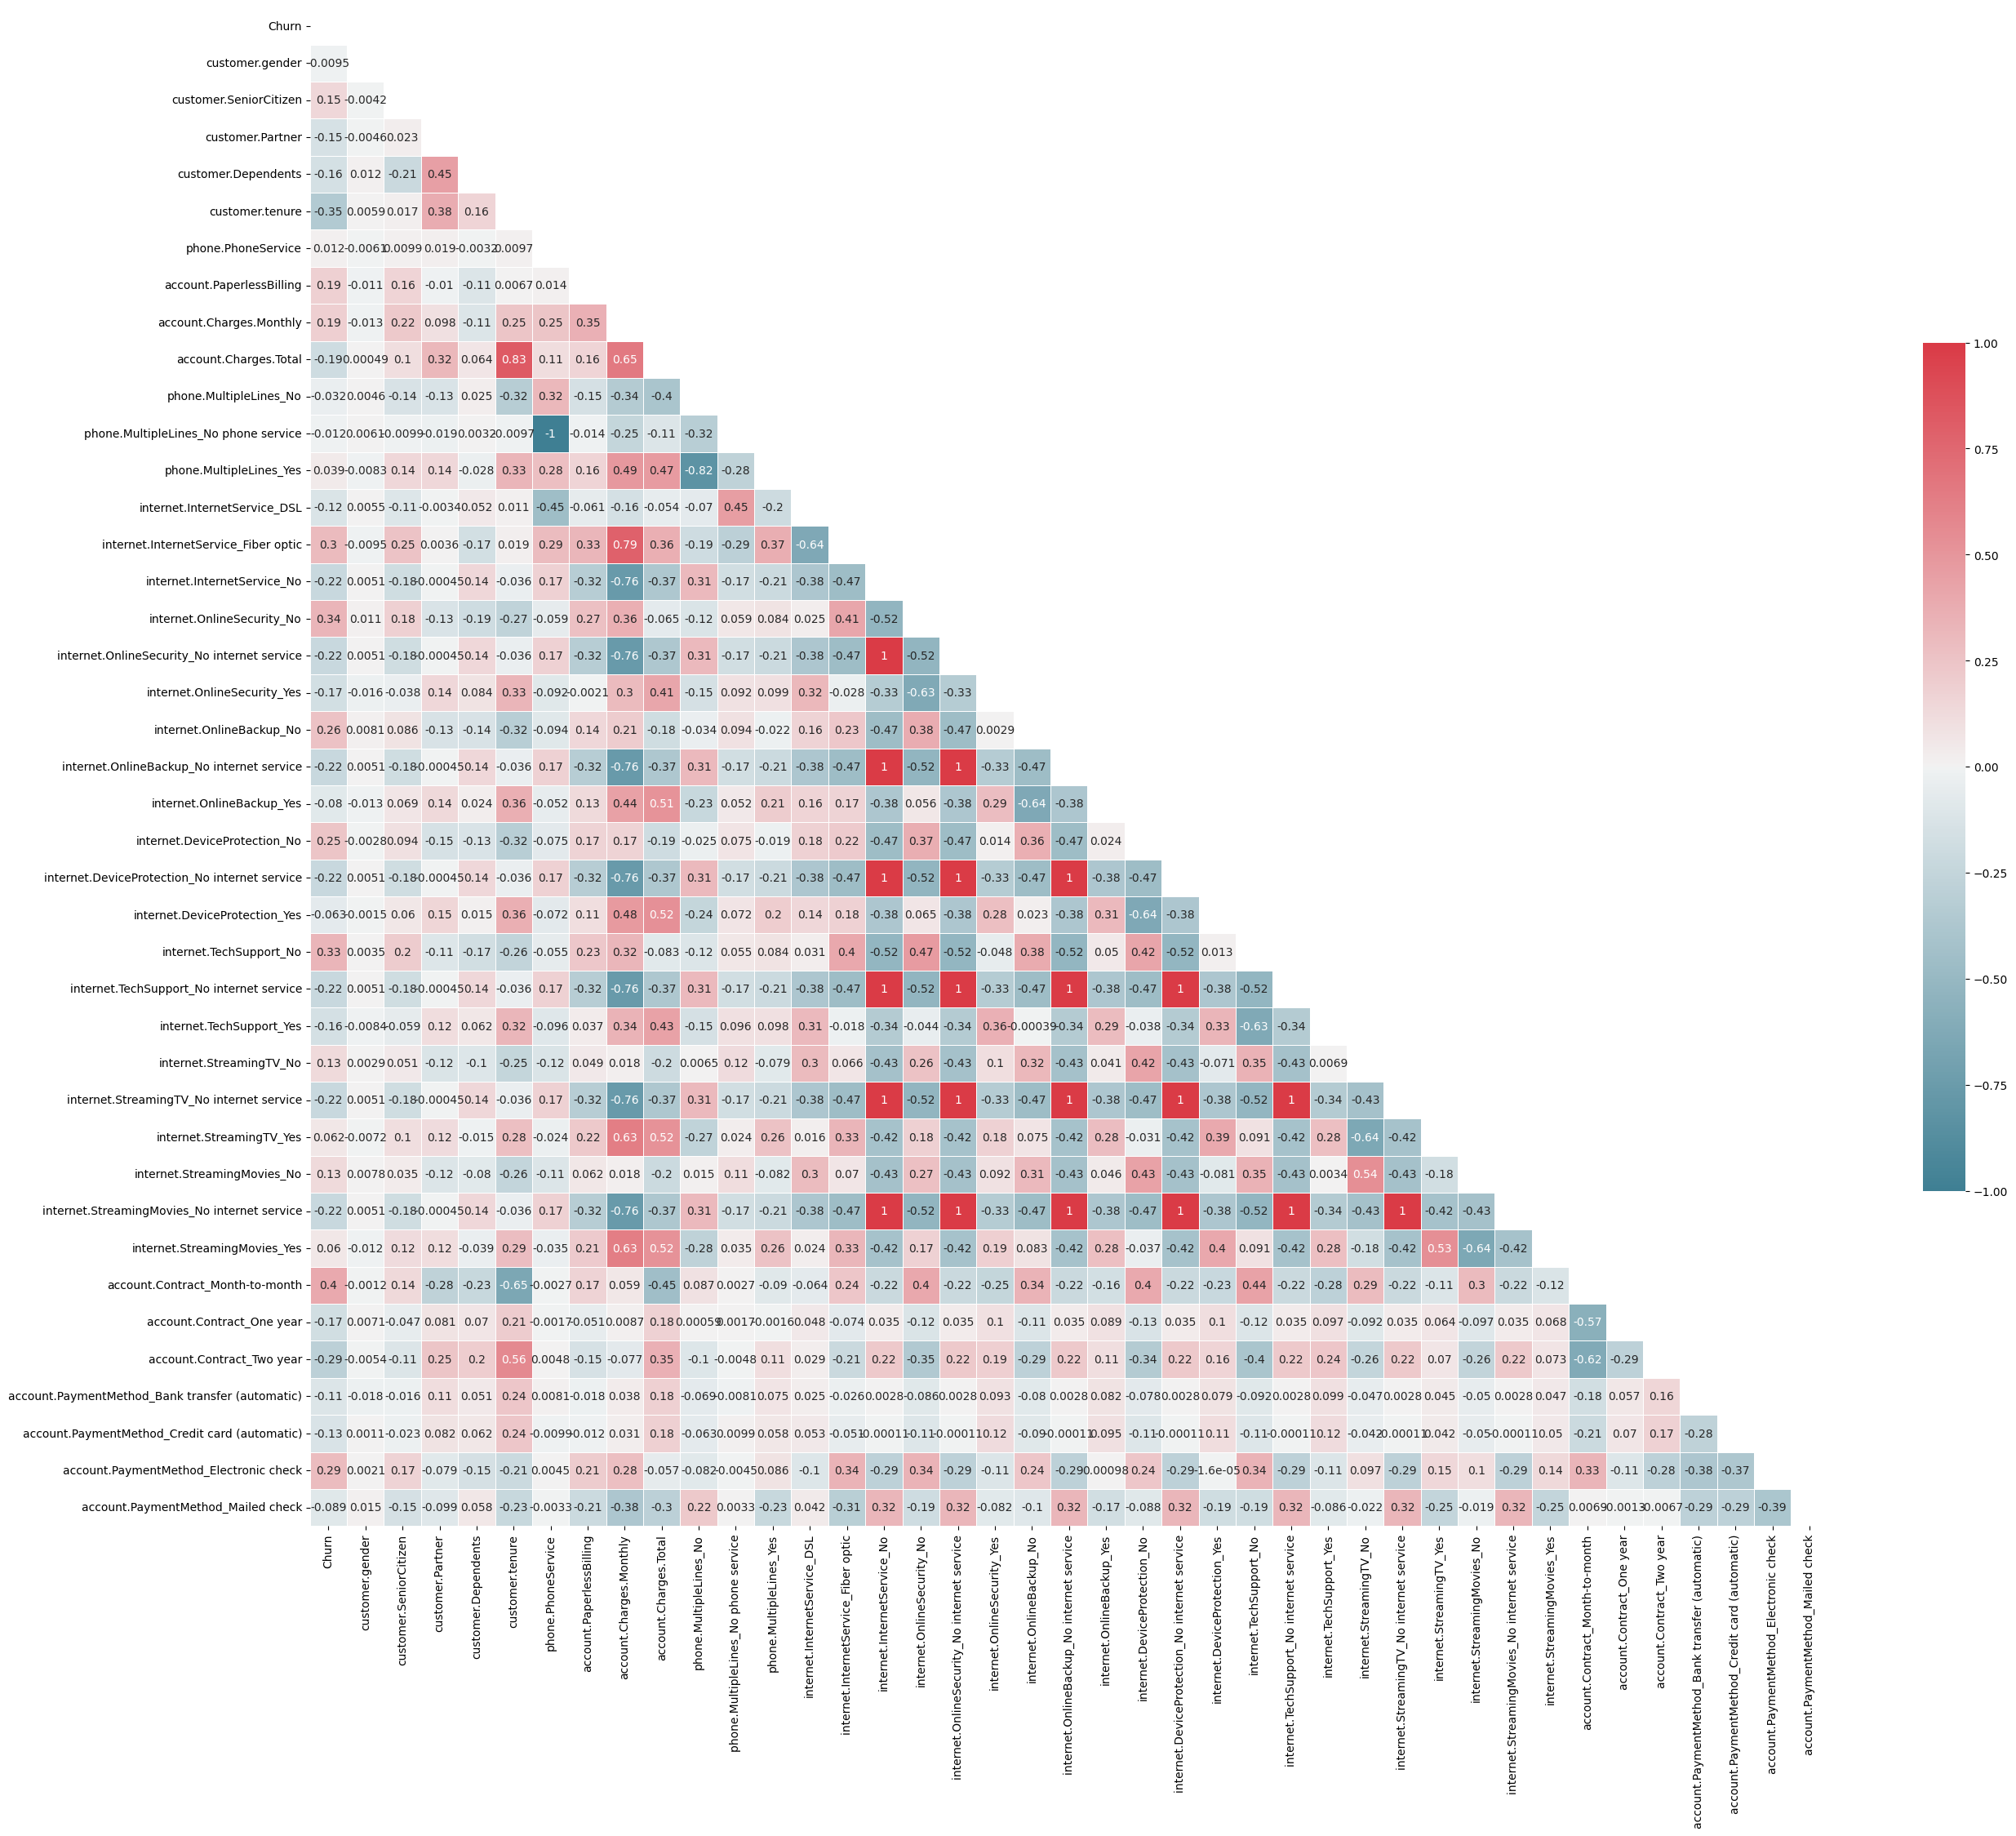

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(30, 27))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

In [81]:
# 1. Obtener la matriz de correlación
corr_matrix = datos_codificados.corr(numeric_only=True)

# 2. Calcular la correlación de todas las variables con Churn
churn_corr = corr_matrix['Churn'].abs().sort_values(ascending=False)

# 3. Seleccionar variables con correlación significativa con Churn (≥ 0.15)
umbral_churn = 0.15
features_churn = churn_corr[churn_corr >= umbral_churn].index.tolist()
features_churn.remove('Churn')  # Quitamos la variable objetivo

# 4. Submatriz de correlación entre esas variables
filtered_corr = datos_codificados[features_churn].corr().abs()

# 5. Eliminar variables que se correlacionen ≥ 0.8 entre sí
umbral_mutua = 0.8
upper_triangle = np.triu(np.ones(filtered_corr.shape), k=1).astype(bool)
filtered_corr_upper = filtered_corr.where(upper_triangle)

# Lista de variables a eliminar
variables_eliminar = [column for column in filtered_corr_upper.columns 
                      if any(filtered_corr_upper[column] > umbral_mutua)]

# 6. Variables finales seleccionadas
features_finales = [var for var in features_churn if var not in variables_eliminar]

# 7. Mostrar resultados
print("✅ Variables con buena correlación con Churn:")
print(features_churn)
print("\n❌ Variables eliminadas por alta correlación mutua (redundantes):")
print(variables_eliminar)
print("\n✅ Variables finales seleccionadas para el modelo:")
print(features_finales)

✅ Variables con buena correlación con Churn:
['account.Contract_Month-to-month', 'customer.tenure', 'internet.OnlineSecurity_No', 'internet.TechSupport_No', 'internet.InternetService_Fiber optic', 'account.Contract_Two year', 'account.PaymentMethod_Electronic check', 'internet.OnlineBackup_No', 'internet.DeviceProtection_No', 'internet.StreamingMovies_No internet service', 'internet.StreamingTV_No internet service', 'internet.TechSupport_No internet service', 'internet.DeviceProtection_No internet service', 'internet.OnlineSecurity_No internet service', 'internet.OnlineBackup_No internet service', 'internet.InternetService_No', 'account.Charges.Total', 'account.Charges.Monthly', 'account.PaperlessBilling', 'account.Contract_One year', 'internet.OnlineSecurity_Yes', 'internet.TechSupport_Yes', 'customer.Dependents']

❌ Variables eliminadas por alta correlación mutua (redundantes):
['internet.StreamingTV_No internet service', 'internet.TechSupport_No internet service', 'internet.DevicePr

Como tenemos una gran cantidad de variables, y muchas de ellas no tienen correelacion con la cancelación (Churn), hay que tomar solo las que si tengan correlacion

C:\Users\opino\AppData\Local\Temp\ipykernel_14552\1476803070.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\opino\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


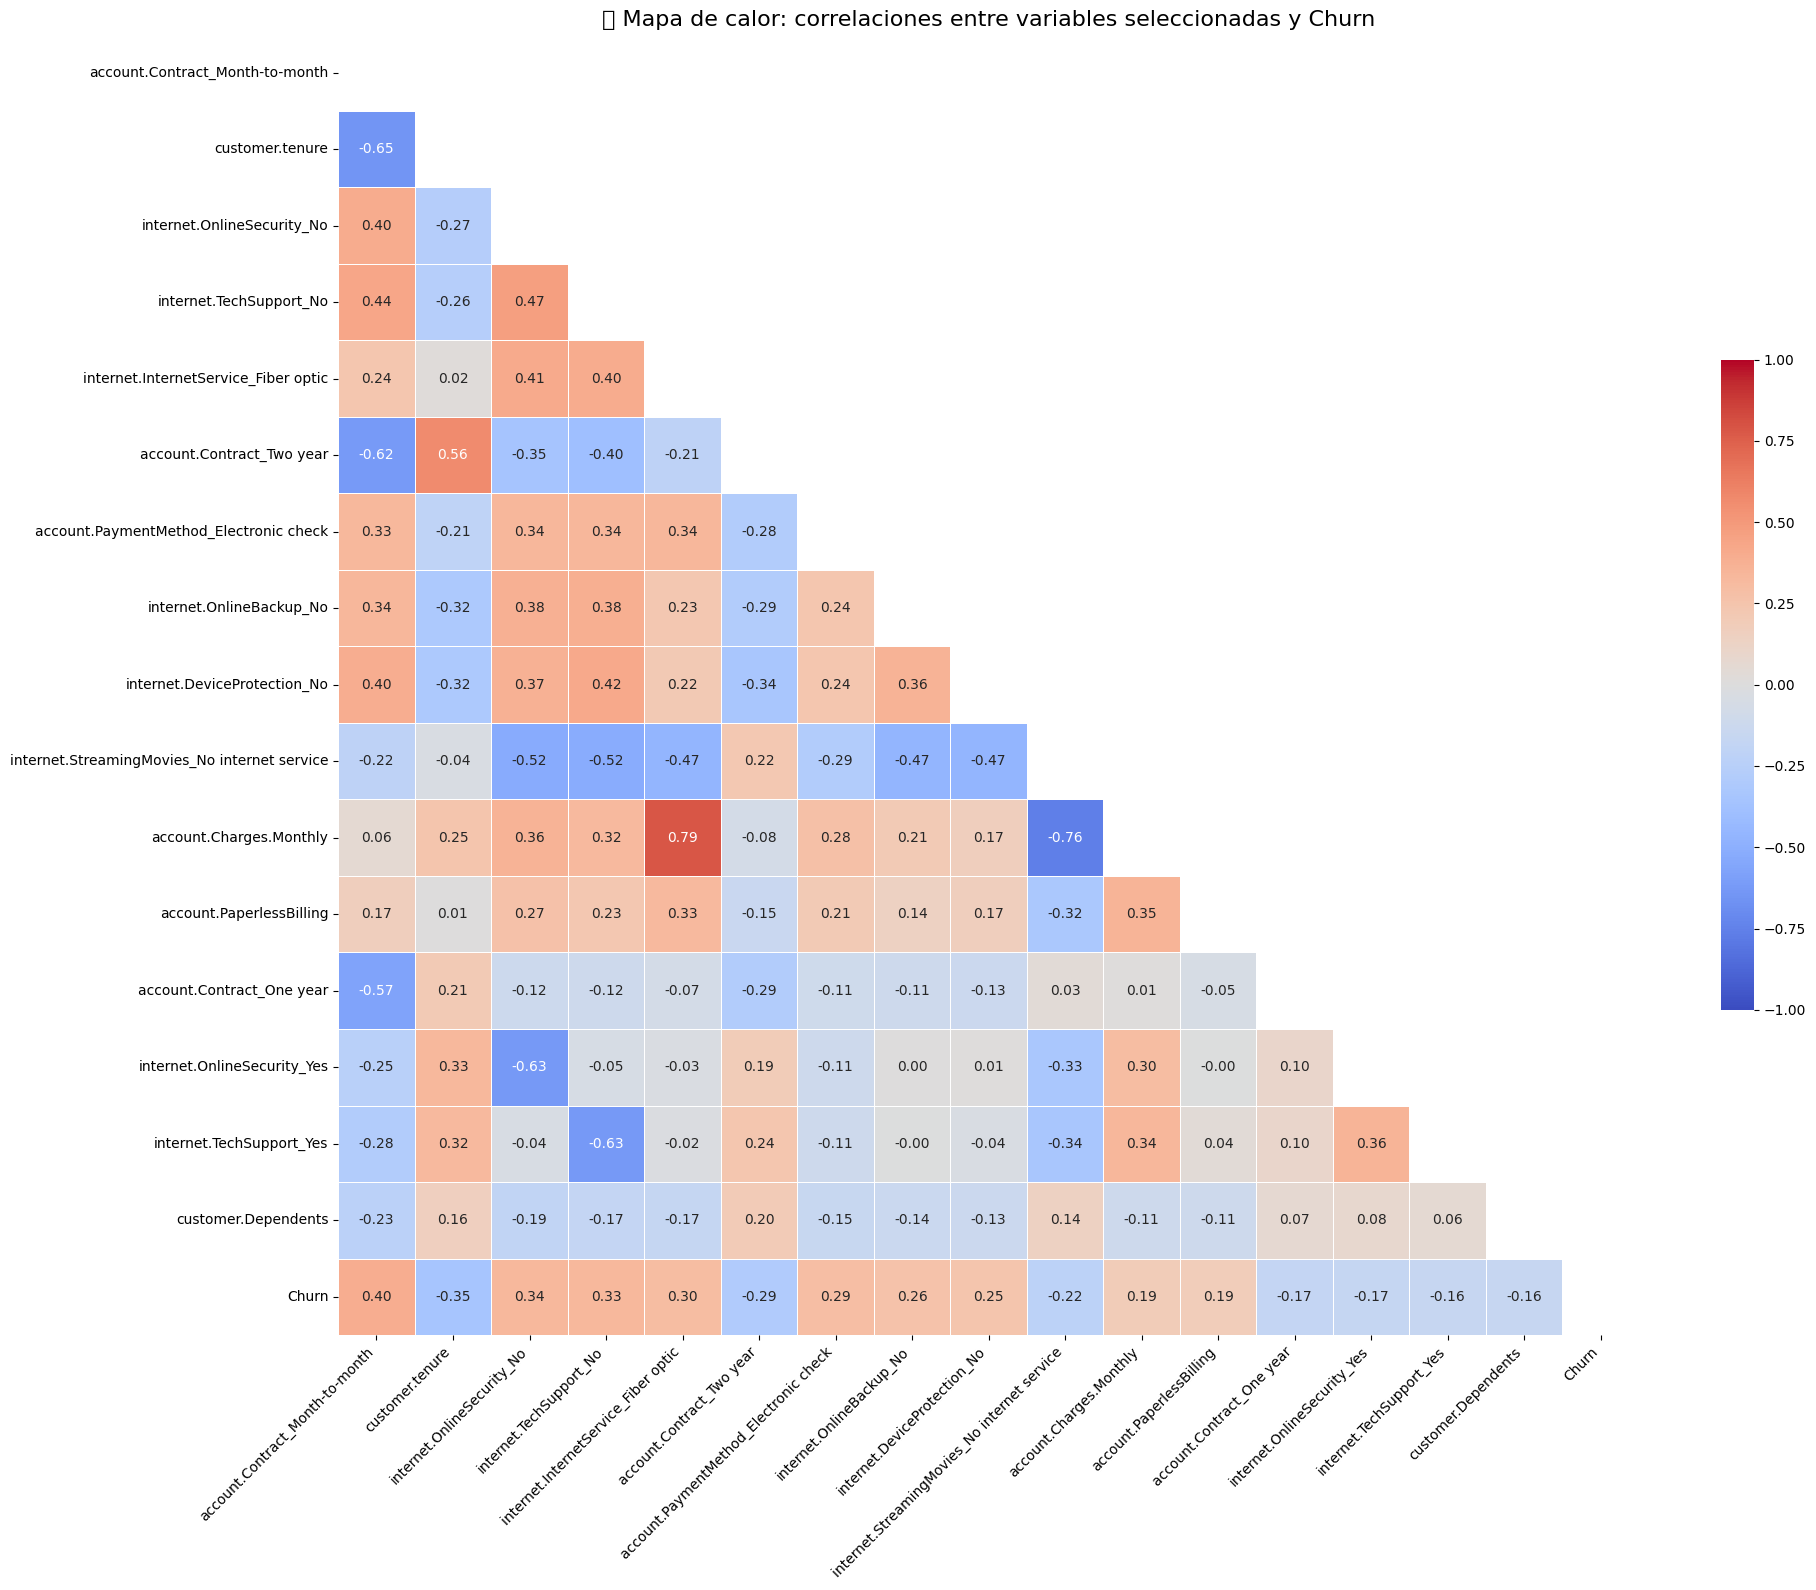

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear submatriz de correlación de las variables seleccionadas
corr = datos_codificados[features_finales + ['Churn']].corr()

# 2. Generar máscara para ocultar el triángulo superior
mascara = np.triu(np.ones_like(corr, dtype=bool))  # oculta parte superior

# 3. Crear figura y mapa de calor
plt.figure(figsize=(20, 16))  # ajusta tamaño según número de columnas

sns.heatmap(corr,
            mask=mascara,
            cmap='coolwarm',       # colores resaltantes
            vmin=-1, vmax=1, center=0,
            square=True,
            linewidths=.5,
            annot=True,            # mostrar valores
            fmt=".2f",
            cbar_kws={"shrink": .5})

plt.title("📊 Mapa de calor: correlaciones entre variables seleccionadas y Churn", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [83]:
# Correlación entre tenure y churn en todo el dataset
print("Correlación global:")
print(datos_codificados[['customer.tenure', 'Churn']].corr())

# Correlación entre tenure y churn en el subset filtrado
print("Correlación en subset:")
print(datos_codificados[features_finales + ['Churn']][['customer.tenure', 'Churn']].corr())

Correlación global:
                 customer.tenure     Churn
customer.tenure         1.000000 -0.345799
Churn                  -0.345799  1.000000
Correlación en subset:
                 customer.tenure     Churn
customer.tenure         1.000000 -0.345799
Churn                  -0.345799  1.000000


### **Balanceo de clases**

Verificación de la proporción de cancelación (Churn) afin que no haya un gran desbalance entre los datos, lo cual puede afectar al modelo

In [84]:
datos_codificados['Churn'].value_counts(normalize=True)

Churn
0    0.74242
1    0.25758
Name: proportion, dtype: float64

#### **Balanceo oversampling**

In [85]:
# Importar biblioteca
from imblearn.over_sampling import SMOTE